# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [3]:
X_test = pd.read_csv("base_score_credit/X_test.csv", delimiter=',')
X_train = pd.read_csv("base_score_credit/X_train_balanced.csv", delimiter=',')
y_test = pd.read_csv("base_score_credit/y_test.csv", delimiter=',')
y_train = pd.read_csv("base_score_credit/y_train_balanced.csv", delimiter=',')

### Verificando as dimensões das bases:

In [4]:
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (252, 7)
Tamanho de X_test: (41, 7)
Tamanho de y_train: (252, 1)
Tamanho de y_test: (41, 1)


### Verificando a separação da base:

In [5]:
X_test.head(5)

,Age,Income,Number of Children,Gender_encoded,Education_encoded,Marital_Status_encoded,Home_Ownership_encoded
0,25.0,55000.0,0,0,2.0,1,1
1,48.0,87500.0,1,0,4.0,0,0
2,26.0,55000.0,1,0,2.0,0,0
3,39.0,62500.0,2,0,2.0,0,0
4,35.0,90000.0,1,0,4.0,0,0


In [6]:
X_train.head(5)

,Age,Income,Number of Children,Gender_encoded,Education_encoded,Marital_Status_encoded,Home_Ownership_encoded
0,26.0,45000.0,0,0,1.0,1,1
1,29.0,27500.0,0,0,0.0,1,1
2,25.0,62500.0,0,0,2.0,1,1
3,29.0,68000.0,2,0,4.0,0,0
4,31.0,65000.0,0,1,2.0,1,1


In [7]:
y_test.head(10)

,Credit_Score_encoded
0,1.0
1,2.0
2,1.0
3,2.0
4,2.0
5,1.0
6,2.0
7,2.0
8,2.0
9,2.0


In [8]:
y_train.head(10)

,Credit_Score_encoded
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
5,2.0
6,2.0
7,2.0
8,1.0
9,2.0


### Verificando o balanceamento:

In [9]:
# Contar o número de exemplos de cada classe em y_train
train_balance = y_train.value_counts()
print(f"Balancemaneto em y_train:{train_balance}")
print()
# Contar o número de exemplos de cada classe em y_test
train_balance = y_test.value_counts()
print(f"Balancemaneto em y_test:{train_balance}")
print()

Balancemaneto em y_train:Credit_Score_encoded
0.0                     84
1.0                     84
2.0                     84
Name: count, dtype: int64

Balancemaneto em y_test:Credit_Score_encoded
2.0                     29
0.0                      6
1.0                      6
Name: count, dtype: int64



O número de linhas é o mesmo para X e Y, as variáveis estão corretas e devidamente tratadas, a base de treino está balanceada, porém a de teste não está, pois não é necessário, já que dados reais possivelmente virão desbalanceados.

# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.


## Preparação dos Dados
- Entendimento da base de dados para identificar se estamos lidando com um problema de regressão ou classificação.
- Limpeza e tratamento dos dados, incluindo remoção ou substituição de valores faltantes, tratamento de outliers e codificação de variáveis categóricas.
- Transformação dos dados
- Balanceamento dos dados
- Seleção das melhores variáveis para reduzir a complexidade e melhorar a eficacia do modelo
- Divisão dos dados em conjuntos de treino e teste

## Criação e Treinamento do Modelo
- Escolha do critério de divisão, como gini ou entropy
- Definição da profundidade máxima da árvore
- Ajuste de hiperparâmetros
- Treinamento do modelo

## Avaliação do Modelo e Interpretação do Modelo
- Utilização de métricas adequadas como accuracy, precision, recall e F1-score para avaliar o desempenho 
- Análise da matriz de confusão para entender erros de classificação.
- Visualização da árvore de decisão para termos o visual das regras criadas.

##  Melhoria do Modelo
- Poda da árvore: Reduz o tamanho da árvore, eliminando divisões irrelevantes e prevenindo overfitting.
- Modificação de hiperparametros para melhor o desempenho do modelo



# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [10]:
arvore_credito = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_credito.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [12]:
previsoes = arvore_credito.predict(X_train)
acuracia = accuracy_score(y_train, previsoes)
print("Acurácia:", acuracia)

Acurácia: 1.0


# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [16]:
previsoes = arvore_credito.predict(X_test)
relatorio = classification_report(y_test, previsoes)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       0.86      1.00      0.92         6
         2.0       1.00      0.97      0.98        29

    accuracy                           0.98        41
   macro avg       0.95      0.99      0.97        41
weighted avg       0.98      0.98      0.98        41



* Para a classe 0 (0.0): A precisão é de 100%, o que significa que 100% das amostras previstas como pertencentes à classe 0 realmente são da classe 0.

* Para a classe 1 (1.0): A precisão é de 86%, indicando que a maioria das amostras previstas como pertencentes à classe 1 realmente são da classe 1.

* Para a classe 2 (2.0): A precisão é de 100%, o que significa que 100% das amostras previstas como pertencentes à classe 2 realmente são da classe 2.

* Para a classe 0 (0.0): A revocação é de 100%, indicando que o modelo identificou corretamente 100% das amostras da classe 0.

* Para a classe 1 (1.0): A revocação é de 100%, indicando que o modelo identificou corretamente 100% das amostras da classe 1.

* Para a classe 2 (2.0): A revocação é de 97%, indicando que o modelo identificou corretamente 97% das amostras da classe 2.

* Para a classe 0 (0.0): O F1-SCORE é de 100%, indicando que o modelo identificou corretamente 100% das amostras da classe 0.

* Para a classe 1 (1.0): O F1-SCORE é de 92%, indicando que o modelo identificou corretamente 92% das amostras da classe 1.

* Para a classe 2 (2.0): O F1-SCORE é de 98%, indicando que o modelo identificou corretamente 98% das amostras da classe 2.

* A acurácia global do modelo é de 98%, o que significa que 98% de todas as previsões do modelo estão corretas.

A média (avg) ponderada (weighted average) das métricas de precisão, recall e F1-score é de 0.98 para as 3 classes


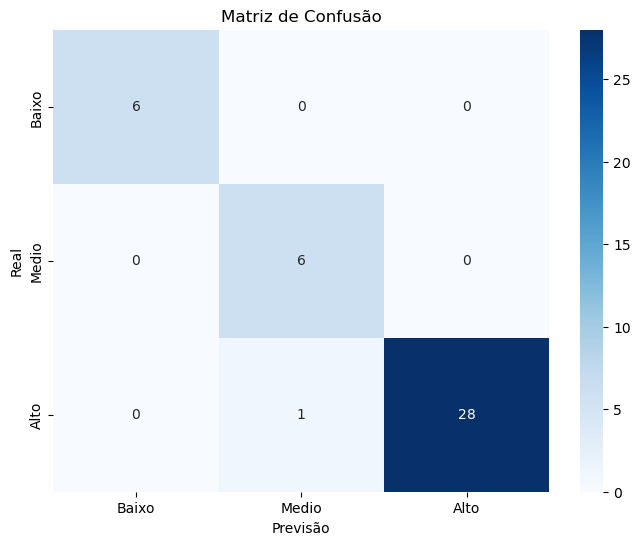

In [18]:
matriz_confusao = confusion_matrix(y_test, previsoes)

# Plotando a matriz de confusão como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Baixo', 'Medio', 'Alto'],
            yticklabels=['Baixo', 'Medio', 'Alto'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

Pude notar que o modelo teve um desempenho satisfatorio tanto em treino quanto em teste contudo nos dados de treino o modelo teve um desempenho um pouco melhor, também é possivel notar que houve um erro por parte da classificação da árvore enquanto o naive bayes modelo utilizado anteriormente acertou 100%.

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

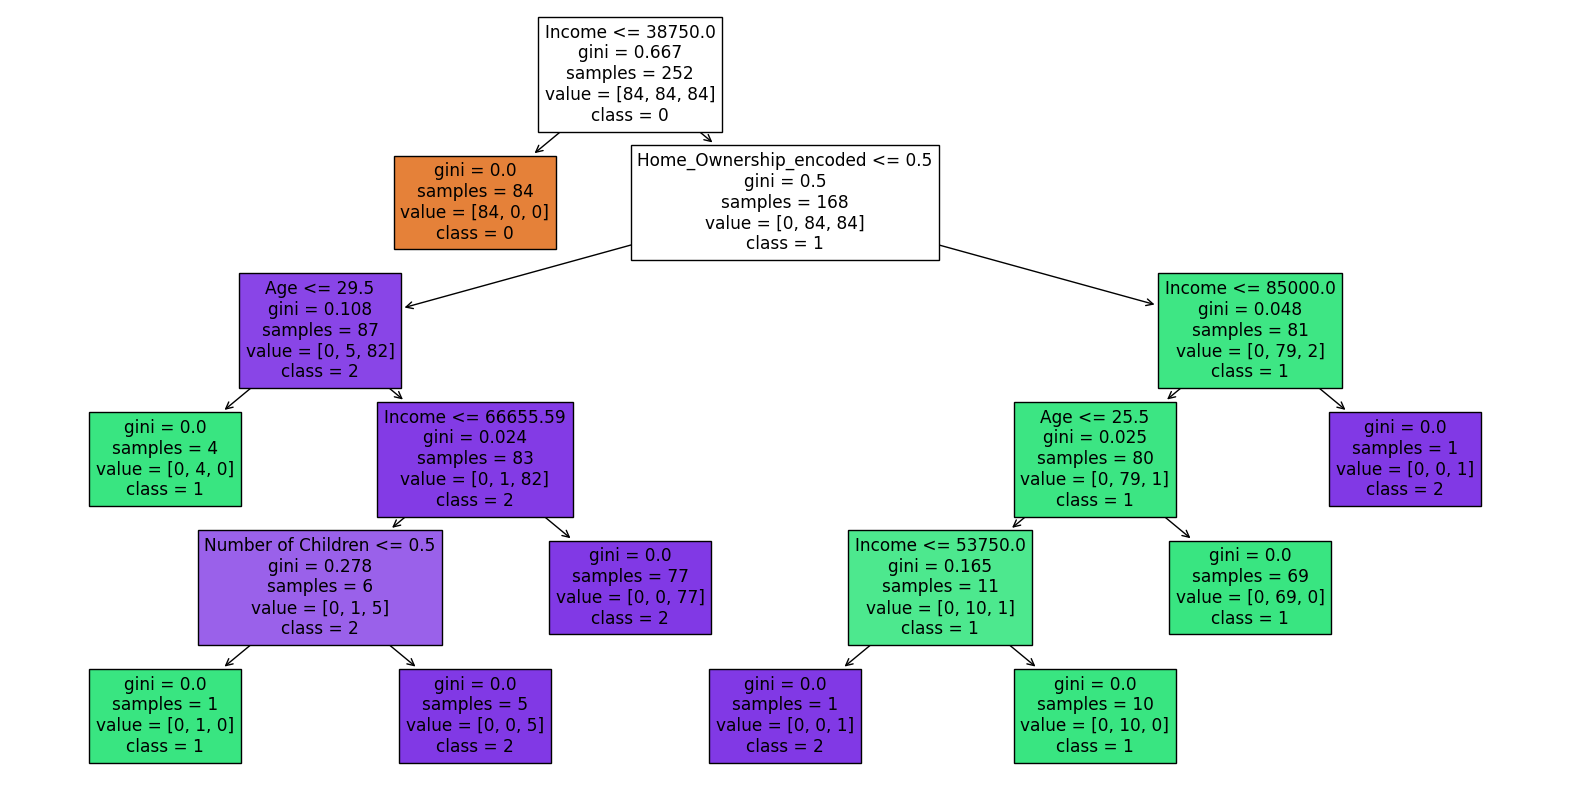

In [19]:
plt.figure(figsize=(20,10))
plot_tree(arvore_credito, filled=True, feature_names=X_train.columns, class_names=['0', '1', '2'])
plt.show()

É possível fazer uma avaliação visual. Podemos observar que as duas características mais impactantes são Income (salário) e HomeOwnership (dono de imóvel).

In [24]:
# Profundidade da árvore
print(f"Profundidade: {arvore_credito.get_depth()}")

Profundidade: 5


# 6) Identifique as 2 principais features do modelo.


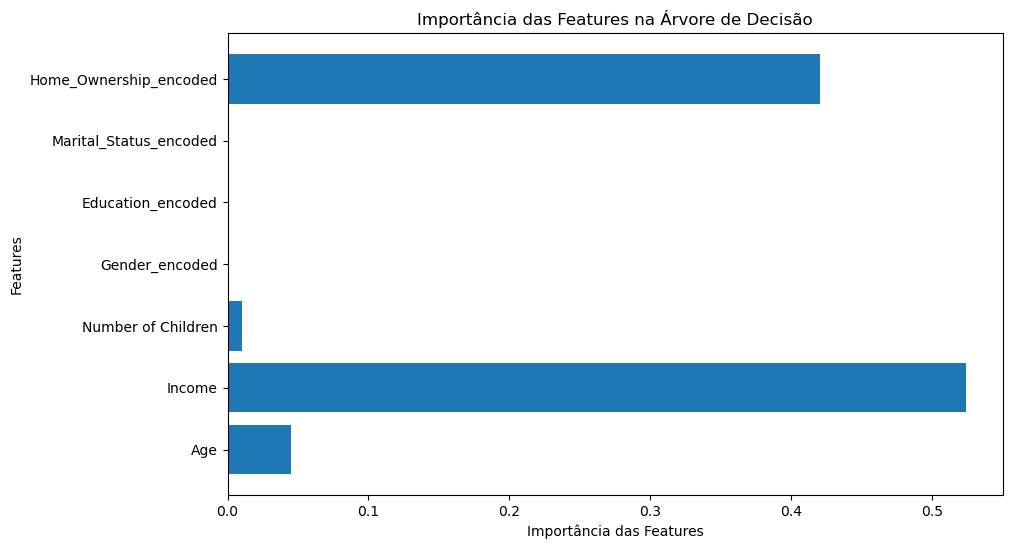

In [25]:
# Obtendo a importância das características do modelo de árvore de decisão
importancias_features = arvore_credito.feature_importances_

# Obtendo os nomes das características
nomes_features = X_train.columns

# Criando um gráfico de barras para visualizar a importância das características
plt.figure(figsize=(10, 6))
plt.barh(nomes_features, importancias_features)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()

Como havíamos visto no plot da árvore anteriormente, podemos observar ainda mais claramente que as duas principais características são Income (salário) e HomeOwnership (Dono de imóvel).

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [26]:
X_train.columns

Index(['Age', 'Income', 'Number of Children', 'Gender_encoded',
       'Education_encoded', 'Marital_Status_encoded',
       'Home_Ownership_encoded'],
      dtype='object')

In [27]:
X_train_reduzido = X_train[['Income', 'Home_Ownership_encoded']]
X_test_reduzido = X_test[['Income', 'Home_Ownership_encoded']]

In [28]:
arvore_credito_reduzida = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_credito_reduzida.fit(X_train_reduzido, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
previsoes_reduzida = arvore_credito_reduzida.predict(X_test_reduzido)

In [30]:
relatorio = classification_report(y_test, previsoes_reduzida)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       0.83      0.83      0.83         6
         2.0       0.97      0.97      0.97        29

    accuracy                           0.95        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.95      0.95      0.95        41



* Para a classe 0 (0.0): A precisão continua de 100%

* Para a classe 1 (1.0): A precisão agora é de 83% houve uma piora

* Para a classe 2 (2.0): A precisão após a mudança é de 97% então também houve uma piora

* Para a classe 0 (0.0): A revocação continua de 100%

* Para a classe 1 (1.0): A revocação agora é de 83% e nesse caso piorou muito

* Para a classe 2 (2.0): A revocação continua de 97%

* Para a classe 0 (0.0): O F1-SCORE continua de 100%

* Para a classe 1 (1.0): O F1-SCORE agora é de 83% houve uma piora 

* Para a classe 2 (2.0): O F1-SCORE agora é de 97% também houve uma piora

* A acurácia global do modelo agora é de 95%, o que significa que também houve uma piora.

A média (avg) ponderada (weighted average) das métricas de precisão, recall e F1-score agora é de 0.95 para as 3 classes então também tivemos uma piora nessa métrica.


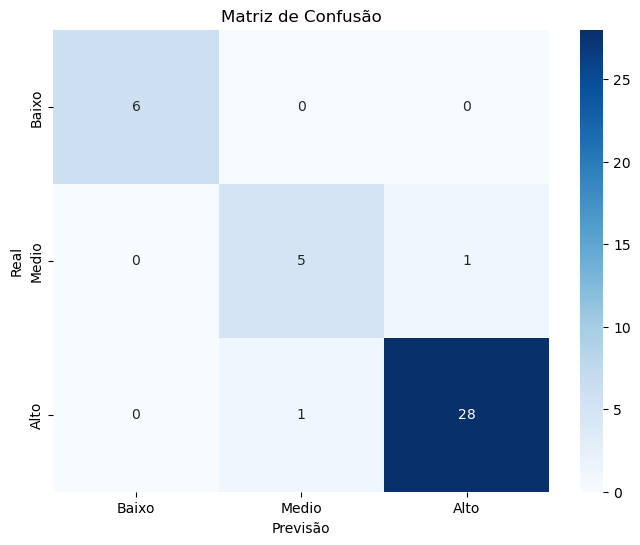

In [31]:
matriz_confusao = confusion_matrix(y_test, previsoes_reduzida)

# Plotando a matriz de confusão como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Baixo', 'Medio', 'Alto'],
            yticklabels=['Baixo', 'Medio', 'Alto'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

Pela matriz de confusão, podemos identificar onde ocorreu o erro na classificação, o que impactou na queda dos valores das métricas de avaliação. Como nosso dataset é pequeno, uma pequena variação pode causar um grande impacto nos valores das métricas.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

O meu modelo Naive Bayes não cometeu nenhum erro de previsão nesta base de dados. Já o modelo de árvore de decisão errou uma previsão e, após os ajustes para reduzir a complexidade, passou a errar duas previsões. Apesar de ser um erro pequeno, o modelo Naive Bayes ainda se mostra mais eficiente para esta base de dados.